In [33]:
import json
import os

import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, AutoMinorLocator
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
%matplotlib inline

In [4]:
from learning import *

In [14]:
MILLION = 1000000

In [2]:
name = 'dqn15_5b5_3236_adam_lr0.001_tmu0.01_ml50K_ns7M_eps0.1'

In [5]:
with open(get_training_path(name), 'r') as f:
    data = json.load(f)

In [7]:
for k, v in data.items():
    data[k] = np.array(v)

In [8]:
data

{'episode_reward': array([-10., -40., -20., ..., 140., 150., 150.]),
 'nb_episode_steps': array([50, 50, 50, ..., 50, 50, 50]),
 'nb_steps': array([     50,     100,     150, ..., 6999900, 6999950, 7000000])}

Break into chunks of 200 episodes

In [9]:
avg, lower, upper = [], [], []
rewards = data['episode_reward']
step = 200
for i in range(0, rewards.shape[0], step):
    sub_rewards = rewards[i:i+step]
    avg.append(np.mean(sub_rewards))
    lower.append(np.amin(sub_rewards))
    upper.append(np.amax(sub_rewards))

In [15]:
nb_episodes = (7*MILLION)/data['nb_episode_steps'][0]
episodes = np.arange(step, nb_episodes+1, step)

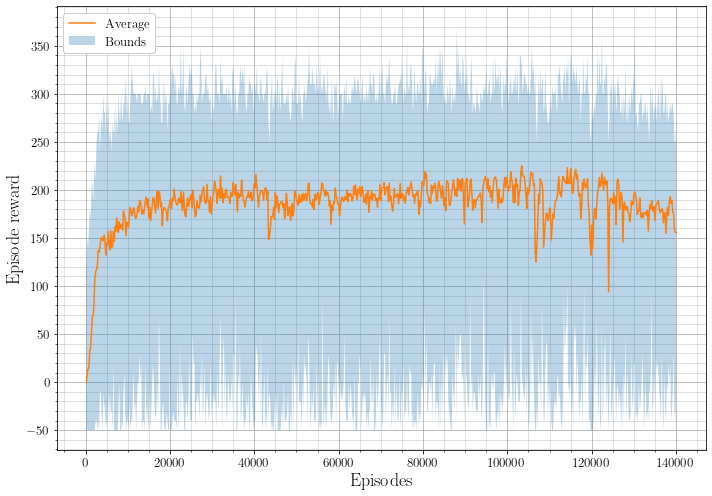

In [36]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.fill_between(episodes, lower, upper, alpha=0.3, label='Bounds', zorder=10)
ax.plot(episodes, avg, color='C1', label='Average', zorder=20)

ax.set_xlabel(r'Episodes', fontsize=18)
ax.set_ylabel(r'Episode reward', fontsize=18)

ax.legend(fontsize=13, loc='upper left', framealpha=1)
    
ax.xaxis.set_major_locator(MultipleLocator(20000))
#ax.xaxis.set_major_formatter('{x:.0f}')
ax.xaxis.set_minor_locator(MultipleLocator(5000))
ax.yaxis.set_major_locator(MultipleLocator(50))
#ax.yaxis.set_major_formatter('{x:.0f}')
ax.yaxis.set_minor_locator(MultipleLocator(10))

ax.grid(which='major')
ax.grid(which='minor', alpha=0.5)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(13)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(13)

fig.tight_layout()
plt.show()